<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/2022_10_10_%EC%84%B8%EC%85%98_AppleStock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [59]:
apple=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')
apple.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 4.  Check out the type of the columns

In [60]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [61]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',', parse_dates=[0])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [62]:
apple.index=apple['Date']

### Step 7.  Is there any duplicate dates?

In [63]:
x = apple[apple.duplicated("Date")]
print(x)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, Adj Close]
Index: []


없음

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [64]:
apple = data.sort_values(by="Date",ascending=True).reset_index(drop=True)
apple.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close,07,06,05,04,03,02,01,12,11,10,09,08,month2
0,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,07,06,05,04,03,02,01,12,11,10,09,08,1980-12
1,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,07,06,05,04,03,02,01,12,11,10,09,08,1980-12
2,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,07,06,05,04,03,02,01,12,11,10,09,08,1980-12
3,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,07,06,05,04,03,02,01,12,11,10,09,08,1980-12
4,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,07,06,05,04,03,02,01,12,11,10,09,08,1980-12
5,1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44,07,06,05,04,03,02,01,12,11,10,09,08,1980-12
6,1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46,07,06,05,04,03,02,01,12,11,10,09,08,1980-12
7,1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48,07,06,05,04,03,02,01,12,11,10,09,08,1980-12
8,1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51,07,06,05,04,03,02,01,12,11,10,09,08,1980-12
9,1980-12-26,35.50,35.62,35.50,35.50,13893600,0.55,07,06,05,04,03,02,01,12,11,10,09,08,1980-12


### Step 9. Get the last business day of each month

In [66]:
apple["month"] = pd.DatetimeIndex(apple.Date).month
apple["Date_wo"] = pd.DatetimeIndex(apple.Date).day
apple.groupby(by="month")[["Date_wo"]].max().reset_index()

,month,Date_wo
0,1,31
1,2,29
2,3,31
3,4,30
4,5,31
5,6,30
6,7,31
7,8,31
8,9,30
9,10,31


In [77]:
print(pd.date_range('1980-12-12',	'2014-07-08', freq='M'))


DatetimeIndex(['1980-12-31', '1981-01-31', '1981-02-28', '1981-03-31',
               '1981-04-30', '1981-05-31', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='M')


### Step 10.  What is the difference in days between the first day and the oldest

In [67]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',', parse_dates=[0])

In [68]:
differnce = apple.Date.max() - apple.Date.min() 
str(differnce)

'12261 days 00:00:00'

### Step 11.  How many months in the data we have?

In [75]:
data['month2']=data['Date'].str[:7]
data['month2'].value_counts()

1997-10    23
2003-10    23
1994-08    23
2011-08    23
1994-03    23
           ..
2005-02    19
1981-02    19
2001-09    15
1980-12    13
2014-07     5
Name: month2, Length: 404, dtype: int64

404개

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [72]:
import matplotlib.pyplot as plt

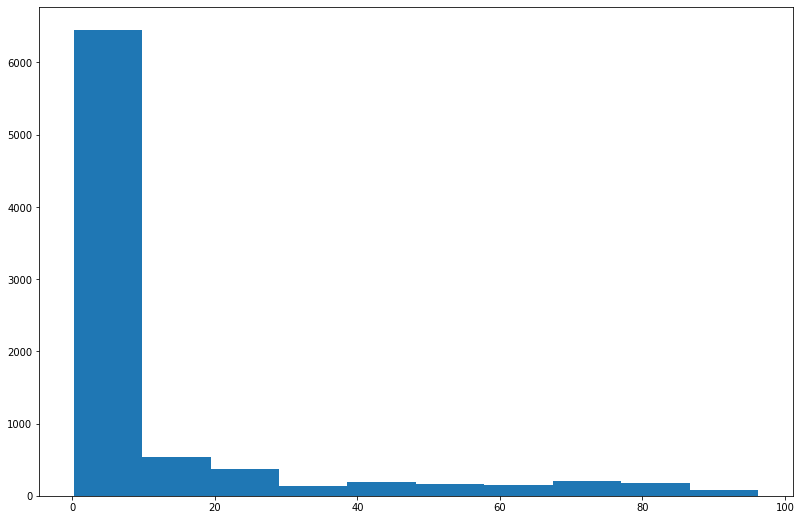

In [73]:
plt.figure(figsize=(13.5, 9))
plt.hist(apple["Adj Close"])
plt.show()

### BONUS: Create your own question and answer it.